## Diagramme de bande

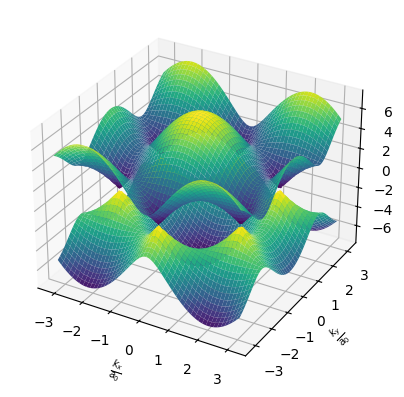

In [17]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.5

kx = np.linspace(-np.pi,np.pi,1000)
ky = np.linspace(-np.pi,np.pi,1000)
kx, ky = np.meshgrid(kx, ky)

k = np.array([kx, ky])
a1 = a / 2 * np.array([3, np.sqrt(3)])
a2 = a / 2 * np.array([3, -np.sqrt(3)])

dot_k_a1 = np.tensordot(k, a1, axes=(0, 0))  
dot_k_a2 = np.tensordot(k, a2, axes=(0, 0))  
dot_k_a2_a1 = np.tensordot(k, a2 - a1, axes=(0, 0))

E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))
E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(kx, ky, E_n, cmap='viridis')
ax.plot_surface(kx, ky, E_p, cmap='viridis')
ax.set_xlabel(r'$\frac{k_x}{a_0}$')
ax.set_ylabel(r'$\frac{k_y}{a_0}$')
ax.set_zlabel(r'E($\mathbf{k}$) (eV)')

plt.show()

In [ ]:
import numpy as np
import scipy.linalg

# Constantes
hbar = 1  # Set hbar=1 for simplicity; change as needed
time = np.linspace(0, 1e-9, 10)
pos_ini = a1
c_a = 1
c_b = 0

def operateur_evolution(kx, ky, t):
    E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(kx * (a2 - a1)[0] + ky * (a2 - a1)[1]) + 2 * np.cos(kx * a1[0] + ky * a1[1]) + 2 * np.cos(kx * a2[0] + ky * a2[1]))
    E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(kx * (a2 - a1)[0] + ky * (a2 - a1)[1]) + 2 * np.cos(kx * a1[0] + ky * a1[1]) + 2 * np.cos(kx * a2[0] + ky * a2[1]))
    # (1000, 1000, 2, 2)
    U = np.zeros((kx.shape[0], kx.shape[1], 2, 2), dtype=complex)

    U[:, :, 0, 0] = np.exp(-1j * E_p * t / hbar)  # (1000,1000)
    U[:, :, 1, 1] = np.exp(-1j * E_n * t / hbar)  # (1000,1000)
    return U

def impulsion(c_a, c_b, kx, ky, pos_ini):

    imp_ini = np.zeros((kx.shape[0], kx.shape[1], 2, 1), dtype=complex)

    imp_ini[:, :, 0, 0] = c_a * np.exp(-1j * (kx * pos_ini[0] + ky * pos_ini[1]))
    imp_ini[:, :, 1, 0] = c_b * np.exp(-1j * (kx * pos_ini[0] + ky * pos_ini[1]))
    return imp_ini

psi_t = []

#print(operateur_evolution(kx,ky,time[1]))
#print(impulsion(c_a, c_b, kx, ky, pos_ini))
for t in time:
    psi = np.einsum('...ij,...jk->...ik', operateur_evolution(kx, ky, t), impulsion(c_a, c_b, kx, ky, pos_ini))
    psi_t.append(psi)
    
